# 5. Model the Solution

### Preprocessing to get the tidy dataframe

In [173]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [28]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [29]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

In [30]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [31]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [32]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


## Question 3: How is Price and Quantity related for Onion in Bangalore?

In [33]:
dfBang = df[df.city == 'BANGALORE']

In [34]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


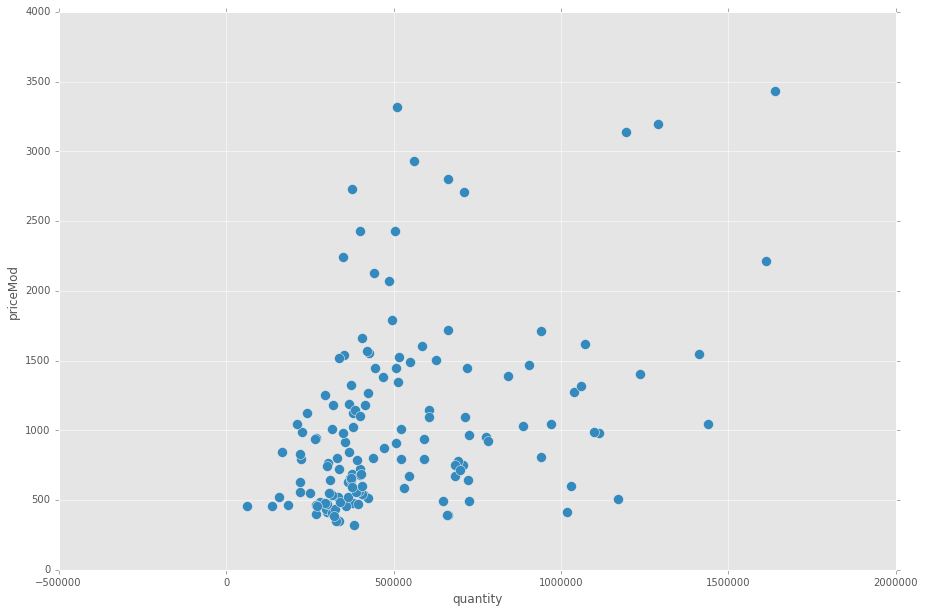

In [35]:
dfBang.plot(kind = "scatter", x = "quantity", y = "priceMod", s = 100)

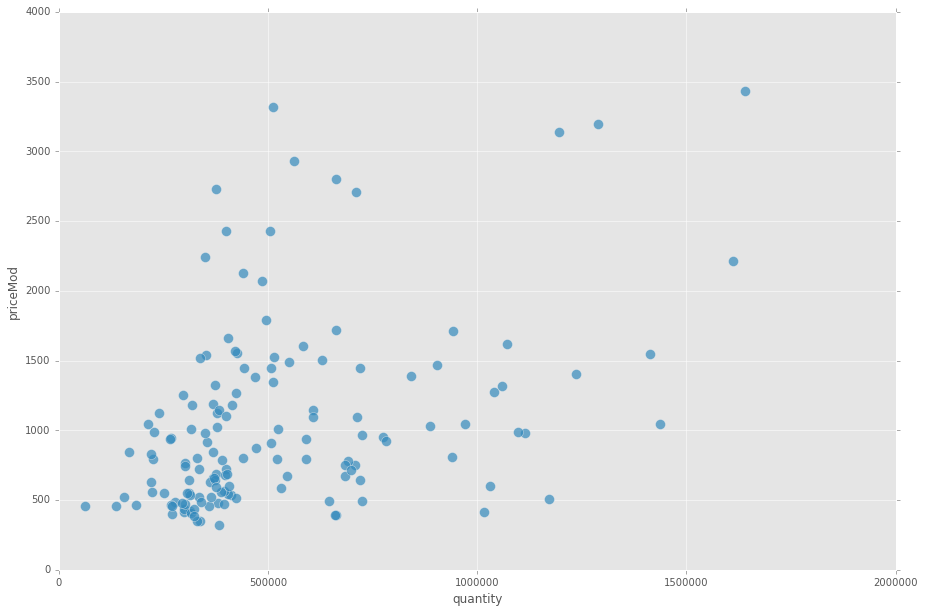

In [36]:
dfBang.plot(kind = "scatter", x = "quantity", y = "priceMod", s = 100, alpha = 0.7, xlim = [0,2000000])

### PRINCIPLE: Correlation

In [37]:
dfBang.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.000000,0.305041,0.220870,0.631430,0.613692
quantity,0.305041,1.000000,0.122583,0.473275,0.414971
priceMin,0.220870,0.122583,1.000000,0.687350,0.776268
priceMax,0.631430,0.473275,0.687350,1.000000,0.975743
priceMod,0.613692,0.414971,0.776268,0.975743,1.000000


In [38]:
pd.set_option('precision', 2)

In [39]:
dfBang.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.00,0.31,0.22,0.63,0.61
quantity,0.31,1.00,0.12,0.47,0.41
priceMin,0.22,0.12,1.00,0.69,0.78
priceMax,0.63,0.47,0.69,1.00,0.98
priceMod,0.61,0.41,0.78,0.98,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122697eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123d3a0b8>]], dtype=object)

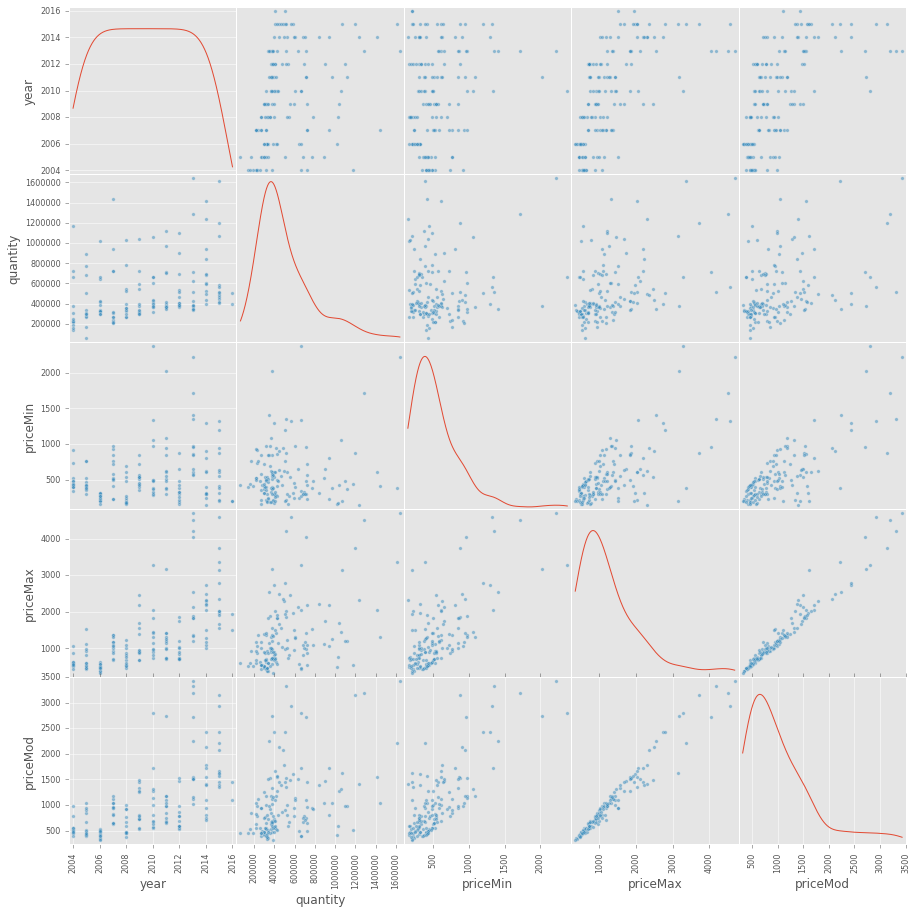

In [47]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dfBang, figsize=(15, 15), diagonal='kde', s = 50)

### PRINCIPLE: Linear Regression

In [65]:
import statsmodels.api as sm

In [82]:
x = dfBang.quantity
y = dfBang.priceMod
lm = sm.OLS(y, x).fit()

In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priceMod   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     353.7
Date:                Thu, 10 Mar 2016   Prob (F-statistic):           9.95e-41
Time:                        11:09:10   Log-Likelihood:                -1156.6
No. Observations:                 146   AIC:                             2315.
Df Residuals:                     145   BIC:                             2318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
quantity       0.0017   9.17e-05     18.808      0.000         0.002     0.002
==============================================================================
Omnibus:                       15.849   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.604
Skew:                           0.622   Prob(JB):                     2.04e-05
Kurtosis:                       4.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PRINCIPLE: Visualizing linear relationships¶

In [84]:
# Import seaborn library for more funcitionality
import seaborn as sns

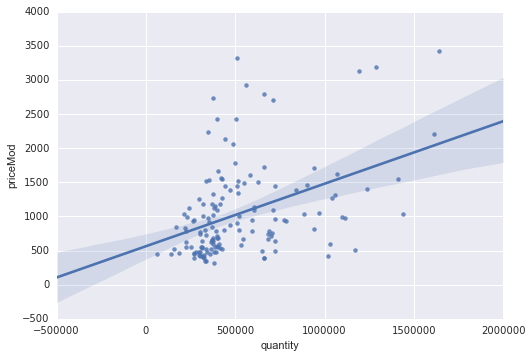

In [85]:
# We can try and fit a linear line to the data to see if there is a relaltionship
sns.regplot(x="quantity", y="priceMod", data=dfBang);

## Question 4: Can we forecast the price of Onion in Bangalore?

### TIme Series Modelling

However, we have our data at constant time intervals of every month. Therefore we can analyze this data  to determine the long term trend so as to forecast the future or perform some other form of analysis. 

- Instead of using linear regression model where observations are independent, our observations are really time-dependent and we should use that.
- Second, we can decompose the time series data into both a trend component and seasonality component to better improve our forecast

In [174]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [175]:
dfBang.index = pd.DatetimeIndex(dfBang.date)

In [176]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceModRolMean
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,991
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,793
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,556
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,465
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,455


In [177]:
# Let us create a time series variable for priceMin
ts = dfBang.priceMin

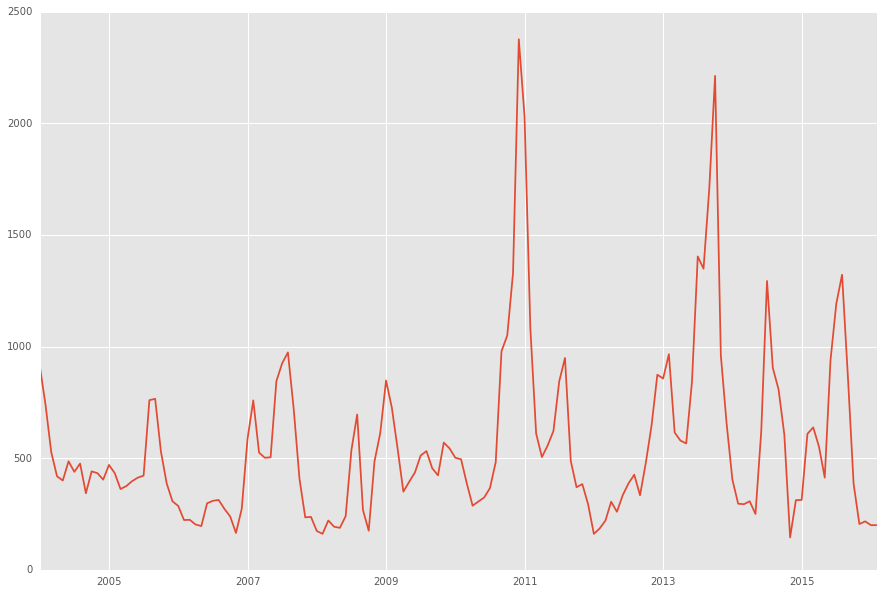

In [178]:
ts.plot()

In [179]:
# Let us take a log transformation to reduce the scale
ts_log = np.log(ts)

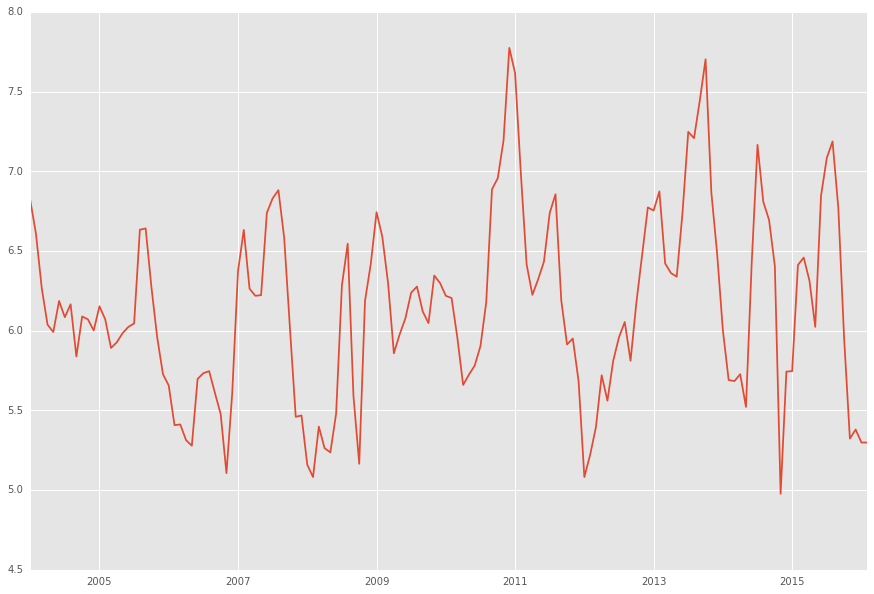

In [180]:
ts_log.plot()

In [183]:
ts_log_ma = pd.rolling_mean(dfBang.priceMin, window=12)

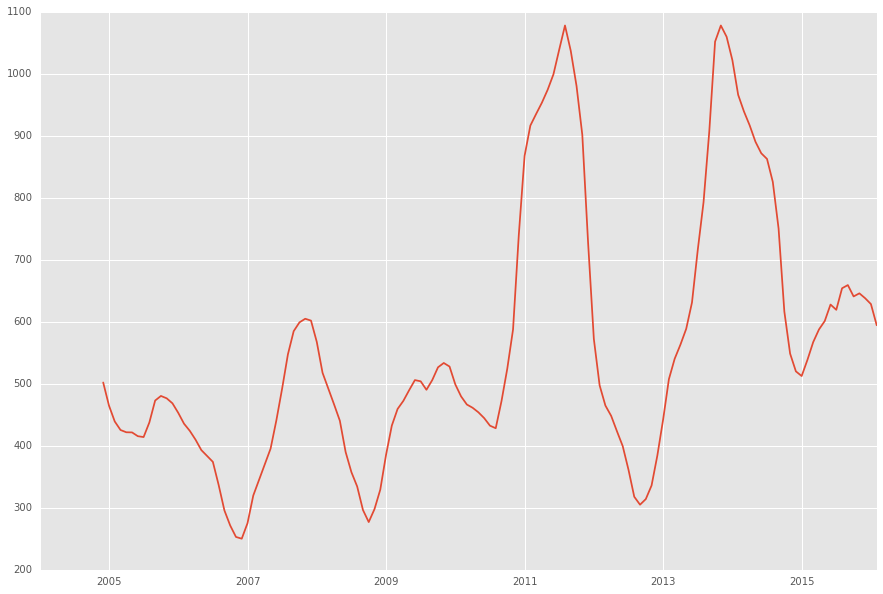

In [184]:
ts_log_ma.plot()

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [186]:
decomposition = seasonal_decompose(ts_log)

In [187]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

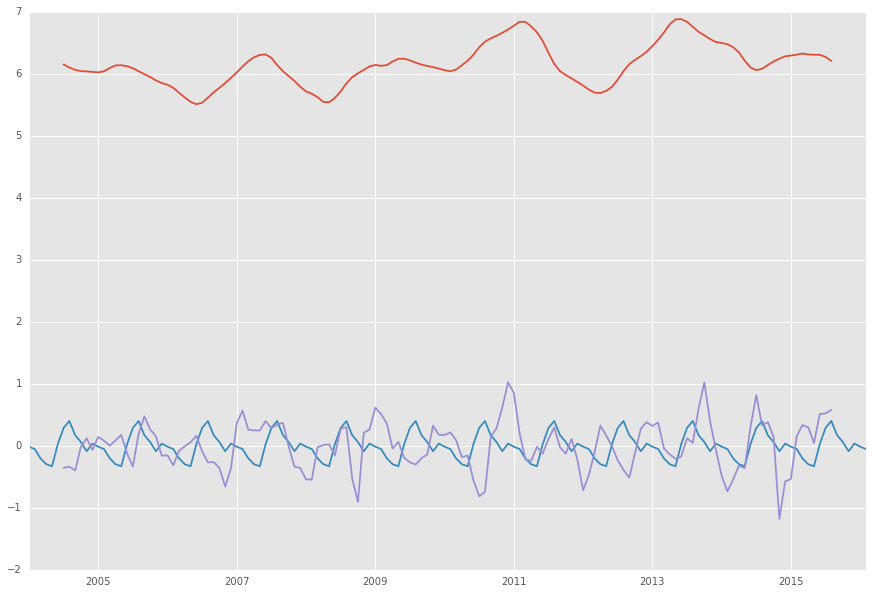

In [188]:
trend.plot.line()
seasonal.plot.line()
residual.plot.line()

In [189]:
# The other approach is to take difference between each observation
ts_log_diff = ts_log - ts_log.shift()

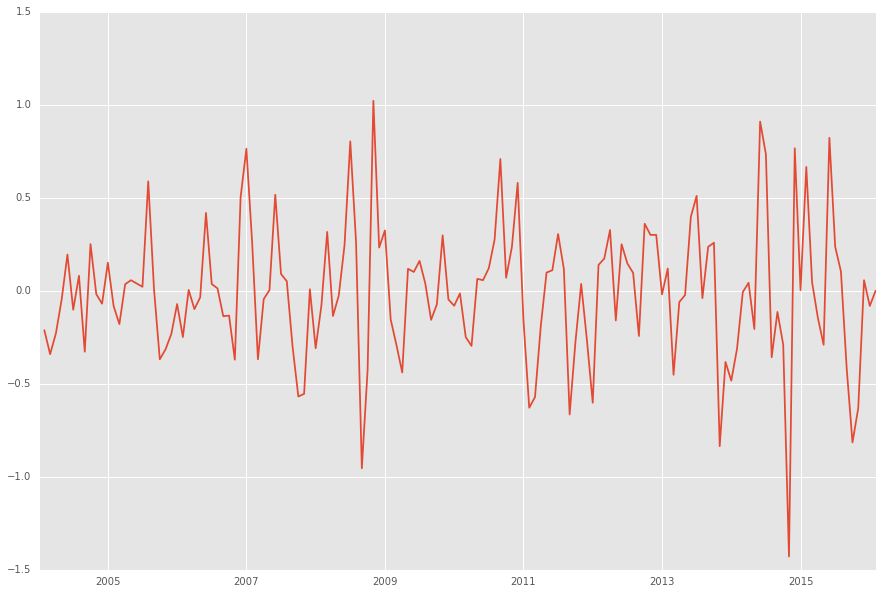

In [191]:
ts_log_diff.plot()